<a href="https://colab.research.google.com/github/yaniv92648/ITC_Final_Project_Personality_Types/blob/master/ITC_Final_Project_Personality_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

py.init_notebook_mode(connected=True)

In [0]:
data = pd.read_csv('MBTI.csv.zip', compression='zip')

In [8]:
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [10]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'There are other things in the same vain as so...
freq,1832,1


In [0]:
target = 'type'
feature = 'posts'

In [55]:
data[target].value_counts(normalize=True)

INFP    0.211182
INFJ    0.169452
INTP    0.150317
INTJ    0.125764
ENTP    0.078963
ENFP    0.077810
ISTP    0.038847
ISFP    0.031239
ENTJ    0.026628
ISTJ    0.023631
ENFJ    0.021902
ISFJ    0.019135
ESTP    0.010259
ESFP    0.005533
ESFJ    0.004841
ESTJ    0.004496
Name: type, dtype: float64

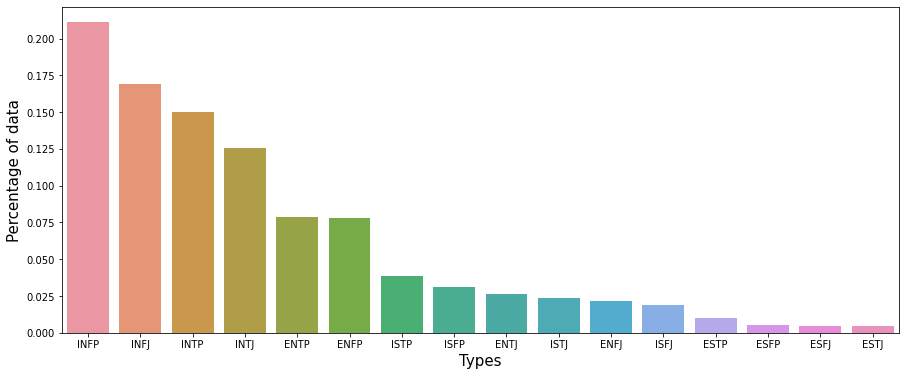

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(types_counts.index, types_counts.values)
plt.ylabel('Percentage of data', fontsize=15)
plt.xlabel('Types', fontsize=15)
plt.show()

We must remember that our dataset is imbalanced and so we need to choose our metric carefully (F1-score is an option)

In [0]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy
le = LabelEncoder()
data_copy = deepcopy(data)
data_copy[feature] = le.fit_transform(data[feature])

In [67]:
data_copy

,type,posts
0,INFJ,7174
1,ENTP,3341
2,INTP,1407
3,INTJ,931
4,ENTJ,6788
...,...,...
8670,ISFP,7346
8671,ENFP,5198
8672,INTP,5156
8673,INFP,2000


In [0]:
from sklearn.model_selection import train_test_split
X = data_copy[[feature]]
y = data_copy[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.00      0.00      0.00       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.00      0.00      0.00       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.00      0.00      0.00       288
        INFP       0.21      1.00      0.35       370
        INTJ       0.00      0.00      0.00       193
        INTP       0.00      0.00      0.00       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.00      0.00      0.00        67

    accuracy                           0.21      1735
   macro avg       0.01   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [46]:
pip install tweepy

In [0]:
# I've created an app on my twitter developer account and this is it's credentials
TWITTER_API_KEY = 'tj9zC2ySqcrmKlbscFg97aGzj'
TWITTER_API_SECRET_KEY = 'JjlTbrxGWghmUuQttD7Eq0rbZ4iDkqwKazOT5epdgvPUds0zNC'

In [0]:
# For later

import tweepy
from tweepy import OAuthHandler

consumerKey = 'my-key'
consumerSecret = 'my-key'

auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(TWITTER_API_KEY, TWITTER_API_SECRET_KEY)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweets = []
for tweet in tweepy.Cursor(api.search, 
                           q='#contentmarketing', 
                           count=2000, 
	lang='en', since='2017-06-20').items():
		tweets.append(tweet)
